# Dados Titanic

O RMS Titanic foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Foi a segunda embarcação da Classe Olympic de transatlânticos depois do RMS Olympic e seguido pelo HMHS Britannic. Projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews, sua construção começou em março de 1909 e ele foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".

A embarcação partiu em sua viagem inaugural de Southampton para Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte com mais de 1 500 pessoas a bordo, sendo um dos maiores desastres marítimos em tempos de paz de toda a história. Seu naufrágio destacou vários pontos fracos de seu projeto, deficiências nos procedimentos de evacuação de emergência e falhas nas regulamentações marítimas da época. Comissões de inquérito foram instauradas nos Estados Unidos e no Reino Unido, levando a mudanças nas leis internacionais de navegação que permanecem em vigor mais de um século depois.

Os destroços do Titanic foram procurados por décadas até serem encontrados em 1985 por uma equipe liderada por Robert Ballard. Ele se encontra a 3843 m de profundidade e a 650 km ao sudeste de Terra Nova no Canadá. Sua história e naufrágio permaneceram no imaginário popular durante décadas, levando a produção de vários livros e filmes a seu respeito, mais notavelmente o filme Titanic de 1997. Até hoje o Titanic permanece como um dos navios mais famosos da história, com seus destroços atraindo várias expedições de exploração ao longo dos anos.

## Origem da Base:
Esta base faz parte do projeto de conclusão do curso de Fundamentos de Data Science I da Udacity, o conjunto de dados tem sua origem no site do Keggle. Temos aqui dado con informações dos passageiros do Titanic. Com base nessas informações, levantaremos questionamentos e respostas quanto as questões ligadas diretamente aos passageiros da embarcação.

Links:
https://www.kaggle.com/c/titanic/data

## DICIONÁRIO DE DADOS:
* Survived (Sobreviveu): 0 = Não 1 = Sim
* Pclass (Classe): Tipo da passagem 1 = 1º Classe, 2 = 2º Classe 3 = 3º Classe
* Sex (Sexo): Sexo do passageiro
* Age (Idade): Idade 
* Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic
* Parch: Quantidade de pais / crianças a bordo do Titanic
* Ticket (Bilhete): Número do bilhete de embarque
* Fare (Tarifa): Valor da passagem
* Cabin (Cabine): Número da cabine
* Embarked (Embarque): Porto de Embarque (C = Cherbourg Q = Queenstown S = Southampton)

##Perguntas que serão respondidas:
1. Quantas pessoas sobreviveram e quantas não sobreviveram ?
2. Qual a idade do passageiro mais velho ?
3. Qual a idade do passageiro mais novo ?
4. Qual a média da idade dos passageiros ?
5. Qual a idade do sobrevivente mais velho do sexo feminino e masculino ?
6. Qual a diferença dos sobreviventes por idade e sexo ?
7. Qual a diferença dos sobreviventes por sexo e classe ?
8. Qual foi a maior taxa de sobrevivência dos passageiros em relação ao sexo ?


In [1]:
#importando dados
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# Carregando arquivo de dados
titanic_df = pd.read_csv ("titanic-data-6.csv")

In [5]:
# Primeiros elementos do arquivo de dados
titanic_df.head ()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Analisar os tipos de dados encontrados no arquivo de dados
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Após analisar os dados e descobrir quais os tipos que lhe são atribúidos, partimos para as análises.

In [7]:
# Verifica o tamanho dos dados
titanic_df.shape

(891, 12)

In [8]:
# Verifica dados duplicados
sum(titanic_df.duplicated())

0

In [9]:
# Verifica colunas com dados em branco ou nulos
titanic_df.columns [titanic_df.isnull().any()].values

array(['Age', 'Cabin', 'Embarked'], dtype=object)

# Limpeza de Dados:

Com a análise acima, temos a dimensão da quantidade de dados que temos para tratar. Vemos que não há dados duplicados, porém as colunas 'Age', 'Cabin' e 'Embarked' possuem dados nulos ou vazios.
Prosseguimos com as colunas que devem ser tratadas pois serão as que irão ser utilizadas.
Começaremos com a coluna 'Age'

.Após os dados serem carregados, as seguintes mudanças serão efetuadas:
1. Checar quais colunas estão com dados vazios ou nulos
2. Normalizar as idades dos passageiros que estão menores que 1 ano
3. Preencher as idades nulas com as média das idades pelo sexo e classe.

In [10]:
# Identifica os valores nulos da coluna 'Age'
n_age = titanic_df['Age'].isnull().sum()
print('Encontrados {0} registros sem valor na coluna Age'.format(n_age))

Encontrados 177 registros sem valor na coluna Age


para rposseguir com a tratativa, precisamos preencher estes dados Faltantes.

In [11]:
# Checagem e normalização da idades dos passageiros menores de 1 ano de vida

def normalage(age):
    """Checa se a idade informada é menor que 1, se sim, sobescreve para o valor 1
            Caso seja maior que 1, retorna o valor informado"""
    
    if age < 1.0:
        return 1.0
    return age

titanic_df['Age'] = titanic_df['Age'].apply(normalage)

Após checar os dados, vemos que a idade foi normalizada com valores acima de 1.0 mas continuamos com valores nulos.
Devemos então preencher esses valores.

In [12]:
titanic_df['Age'].describe()

count    714.000000
mean      29.701681
std       14.521395
min        1.000000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
# Para haver um preenchimento coerente, devemos analisar a idade média por sexo e por classe. Só assim teremos os dados faltantes.
age_mean_h = titanic_df[titanic_df['Sex'] == 'male'].groupby('Pclass')['Age'].mean()
age_mean_m = titanic_df[titanic_df['Sex'] == 'female'].groupby('Pclass')['Age'].mean()
print(age_mean_h)
print(age_mean_m)                                                                         

Pclass
1    41.282178
2    30.747475
3    26.509881
Name: Age, dtype: float64
Pclass
1    34.611765
2    28.722973
3    21.754902
Name: Age, dtype: float64


In [14]:
#Preenchimento dos registros nulos com a média por classe e sexo
titanic_df['Age'] = titanic_df['Age'].groupby([titanic_df['Sex'], titanic_df['Pclass']]).apply(lambda x: x.fillna(x.median()))

In [15]:
# Verificando se todos os dados nulos foram preenchidos
titanic_df['Age'].isnull().sum()

0

In [16]:
#alterar o tipo da coluna 'Age'
titanic_df['Age'] = titanic_df['Age'].astype(int)

Após a limpeza dos dados, iremos começar a analisar as informações do arquivo de ados.

In [17]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.1+ KB


In [18]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.080808,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.309462,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Primeira pergunta: Quantas pessoas sobreviveram e quantas não?

A quantidade em percentual de sobreviventes é de 38.4% e das que não sobreviveram é de 61.6%


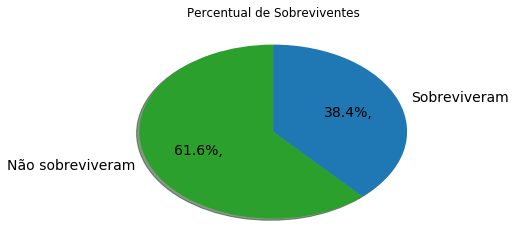

In [19]:
titanic_df['Survived'].value_counts().plot.pie(colors=('tab:green', 'tab:blue'),title='Percentual de Sobreviventes',fontsize=14, shadow=True, startangle=90, autopct='%1.1f%%,',labels=('Não sobreviveram','Sobreviveram'),figsize=(6,4)).set_ylabel('')

data_survived = titanic_df['Survived'].value_counts()
total = data_survived.sum()
not_survived = data_survived[0]
survived = data_survived[1]

def calc_percentual(survived, total):
    """Calcula o percentual sobre o total
    
        Args:
            Survived: quantidade a ser analisada
            total: quantidade total de dados"""
    return round (((survived *100) / total), 1)
print ('A quantidade em percentual de sobreviventes é de {0}% e das que não sobreviveram é de {1}%'.format(calc_percentual(survived, total), calc_percentual(not_survived, total)))

O que temos de informações sobre a idade dos passageiros?

In [20]:
titanic_df['Age'].describe()


count    891.000000
mean      29.080808
std       13.309462
min        1.000000
25%       21.000000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

Na análise tivemos:
    Maior idade: 80
    Menor idade: 1, ou menos, já que aproximamos as idades menores que 1
    Idade média: 29 

No gráfico abaixo é possível visualizer melhor a distribuição de idade dos passageiros


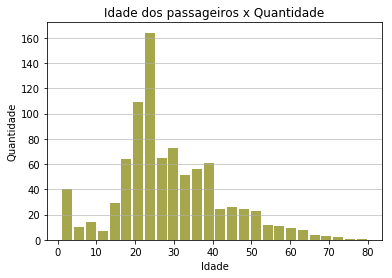

In [21]:
#Iremos distribuir a idade dos passageiros em um gráfico.
filtered_age = titanic_df[titanic_df['Age'].notnull()]
n, bins, patches = plt.hist(x=filtered_age['Age'], bins='auto', color='#808000', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Idade dos passageiros x Quantidade')
maxfreq = n.max()
print('No gráfico abaixo é possível visualizer melhor a distribuição de idade dos passageiros')

In [22]:
male_surv = titanic_df[(titanic_df.Sex == "male") & (titanic_df.Survived == 1)]
print('O Homem mais velho a sobreviver tinha {0} anos e o mais novo tinha {1} anos.'.format(male_surv['Age'].max(),male_surv['Age'].min()))
male_surv = titanic_df[(titanic_df.Sex == "male") & (titanic_df.Survived == 0)]
print('O Homem mais velho a morrer tinha {0} anos e o mais novo tinha {1} anos.'.format(male_surv['Age'].max(),male_surv['Age'].min()))

O Homem mais velho a sobreviver tinha 80 anos e o mais novo tinha 1 anos.
O Homem mais velho a morrer tinha 74 anos e o mais novo tinha 1 anos.


In [23]:
female_surv = titanic_df[(titanic_df.Sex == "female") & (titanic_df.Survived == 1)]
print('A Mulher mais velha a sobreviver tinha {0} anos e a mais nova tinha {1} anos.'.format(female_surv['Age'].max(),female_surv['Age'].min()))
female_surv = titanic_df[(titanic_df.Sex == "male") & (titanic_df.Survived == 0)]
print('A Mulher mais velha a morrer tinha {0} anos e a mais nova tinha {1} anos.'.format(female_surv['Age'].max(),female_surv['Age'].min()))

A Mulher mais velha a sobreviver tinha 63 anos e a mais nova tinha 1 anos.
A Mulher mais velha a morrer tinha 74 anos e a mais nova tinha 1 anos.


In [24]:
male_surv = titanic_df[(titanic_df.Sex == "male") & (titanic_df.Survived == 1)].groupby('Pclass')
print('A idade MÁXIMA dos homens mais velhos a sobreviver na 1 Classe foi de: {0} anos, Na segunda classe foi de: {1} anos, na terceira classe foi de: {2} anos.'.format(male_surv['Age'].max()[1], male_surv['Age'].max()[2], male_surv['Age'].max()[3]))
male_surv = titanic_df[(titanic_df.Sex == "male") & (titanic_df.Survived == 0)].groupby('Pclass')
print('A idade MÁXIMA dos homens mais velhos a  NÃO sobreviver na 1 Classe foi de: {0} anos, Na segunda classe foi de: {1} anos, na terceira classe foi de: {2} anos.'.format(male_surv['Age'].max()[1], male_surv['Age'].max()[2], male_surv['Age'].max()[3]))

A idade MÁXIMA dos homens mais velhos a sobreviver na 1 Classe foi de: 80 anos, Na segunda classe foi de: 62 anos, na terceira classe foi de: 45 anos.
A idade MÁXIMA dos homens mais velhos a  NÃO sobreviver na 1 Classe foi de: 71 anos, Na segunda classe foi de: 70 anos, na terceira classe foi de: 74 anos.


In [70]:
female_surv = titanic_df[(titanic_df.Sex == "female") & (titanic_df.Survived == 1)].groupby('Pclass')
print('A idade MÁXIMA das mulheres mais velhas a sobreviver na 1 Classe foi de: {0} anos, Na segunda classe foi de: {1} anos, na terceira classe foi de: {2} anos.'.format(female_surv['Age'].max()[1], female_surv['Age'].max()[2], female_surv['Age'].max()[3]))
female_surv = titanic_df[(titanic_df.Sex == "female") & (titanic_df.Survived == 0)].groupby('Pclass')
print('A idade MÁXIMA das mulheres mais velhas a NÃO sobreviver na 1 Classe foi de: {0} anos, Na segunda classe foi de: {1} anos, na terceira classe foi de: {2} anos.'.format(female_surv['Age'].max()[1], female_surv['Age'].max()[2], female_surv['Age'].max()[3]))

A idade MÁXIMA das mulheres mais velhas a sobreviver na 1 Classe foi de: 63 anos, Na segunda classe foi de: 55 anos, na terceira classe foi de: 63 anos.
A idade MÁXIMA das mulheres mais velhas a NÃO sobreviver na 1 Classe foi de: 50 anos, Na segunda classe foi de: 57 anos, na terceira classe foi de: 48 anos.


Analisando o total de sobreviventes Masculinos, vemos que quase 50% eram da primeira classe e 25% eram da terceira classe. O que mostra que o fator classe foi importante para a sobrevivência dos passageiros.


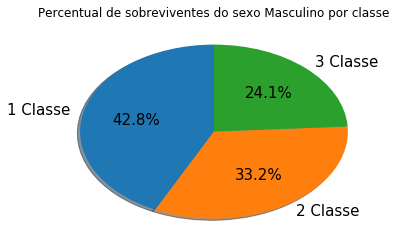

In [109]:
male_surv = titanic_df[(titanic_df.Sex == "male") & (titanic_df.Survived == 1)].groupby('Pclass')
male_surv['Age'].max().plot.pie(title='Percentual de sobreviventes do sexo Masculino por classe',labels=('1 Classe', '2 Classe', '3 Classe'), fontsize=15, shadow=True, startangle=90, autopct='%1.1f%%',figsize=(6,4)).set_ylabel('')
                               
print('Analisando o total de sobreviventes Masculinos, vemos que quase 50% eram da primeira classe e 25% eram da terceira classe. O que mostra que o fator classe foi importante para a sobrevivência dos passageiros.')

Analisando o total de sobreviventes Femininos, vemos houve uma apoximação no total de sobrevivência das classes. Ainda assim, as mulheres da 1 classe tiveram maior índice


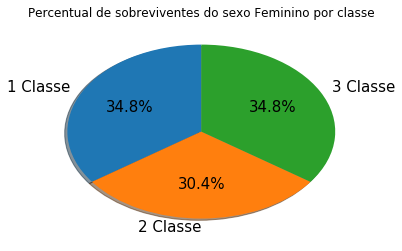

In [74]:
female_surv = titanic_df[(titanic_df.Sex == "female") & (titanic_df.Survived == 1)].groupby('Pclass')
female_surv['Age'].max().plot.pie(title='Percentual de sobreviventes do sexo Feminino por classe',labels=('1 Classe', '2 Classe', '3 Classe'), fontsize=15, shadow=True, startangle=90, autopct='%1.1f%%',figsize=(6,4)).set_ylabel('')
                               
print('Analisando o total de sobreviventes Femininos, vemos houve uma apoximação no total de sobrevivência das classes. Ainda assim, as mulheres da 1 classe tiveram maior índice')

O que podemos analisar sobre o sexo dos passsageiros e a taxa de sobrevivência.

Podemos então concluir que apenas 109 homens sobreviveram e 468 não sobreviveram


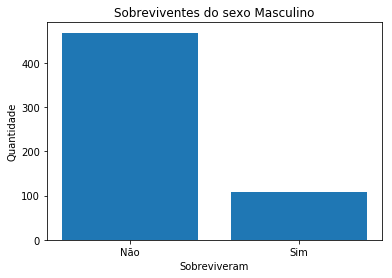

In [84]:
male_survived = titanic_df[titanic_df['Sex'] == "male"]["Survived"]

locations = [1, 2]
heights = male_survived.value_counts()
labels = ['Não', 'Sim']
plt.bar(locations, heights, tick_label=labels)
plt.title('Sobreviventes do sexo Masculino')
plt.xlabel('Sobreviveram')
plt.ylabel('Quantidade');

print('Podemos então concluir que apenas {0} homens sobreviveram e {1} não sobreviveram'.format(male_survived.value_counts()[1], male_survived.value_counts()[0]))

Podemos então concluir que apenas 233 Mulheres sobreviveram e 81 não sobreviveram


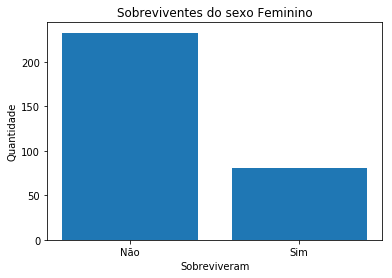

In [85]:
female_survived = titanic_df[titanic_df['Sex'] == "female"]["Survived"]

locations = [1, 2]
heights = female_survived.value_counts()
labels = ['Não', 'Sim']
plt.bar(locations, heights, tick_label=labels)
plt.title('Sobreviventes do sexo Feminino')
plt.xlabel('Sobreviveram')
plt.ylabel('Quantidade');
print('Podemos então concluir que apenas {0} Mulheres sobreviveram e {1} não sobreviveram'.format(female_survived.value_counts()[1],female_survived.value_counts()[0]))

In [94]:
print('Passageiros por classe e sexo que sobreviveram')
pvt1_df = titanic_df[titanic_df['Survived'] == 1].pivot_table('PassengerId', ['Sex'], 'Pclass', aggfunc='count')
pvt1_df

Passageiros por classe e sexo que sobreviveram


Pclass,1,2,3
Sex,,,
female,91,70,72
male,45,17,47


In [95]:
print('Passageiros por classe e sexo que NÃO sobreviveram')
pvt1_df = titanic_df[titanic_df['Survived'] == 0].pivot_table('PassengerId', ['Sex'], 'Pclass', aggfunc='count')
pvt1_df

Passageiros por classe e sexo que NÃO sobreviveram


Pclass,1,2,3
Sex,,,
female,3,6,72
male,77,91,300


Pela tabela podemos analisar que o índice de sobrevivência das mulheres da primeira classe foi muito alto. Os homens da terceira classe foram de maior índice de mortalidade.

<Figure size 432x288 with 0 Axes>

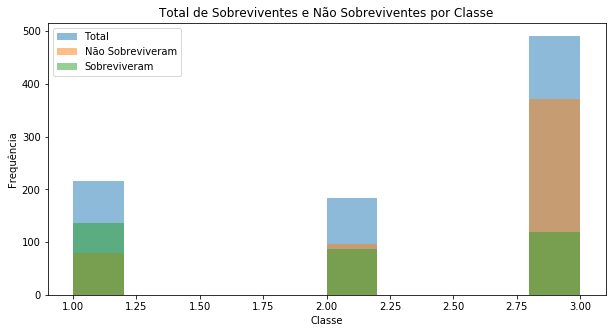

No gráfico acima é possível visualizer de forma clara os sobreviventes e não sobreviventes por classe. Ficando evidente que aprimeira e a segunda classe tiveram mais chance de sobrevivência.


In [111]:
df_histage = pd.DataFrame({'Total': titanic_df['Pclass'],'Não Sobreviveram': titanic_df[titanic_df['Survived'] == 0]['Pclass'],'Sobreviveram': titanic_df[titanic_df['Survived'] == 1]['Pclass']},columns=['Total', 'Não Sobreviveram', 'Sobreviveram'])
plt.figure();
df_histage.plot.hist(bins=10, alpha=0.5, figsize=(10,5),
                    title='Total de Sobreviventes e Não Sobreviventes por Classe')
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.show()

print('No gráfico acima é possível visualizer de forma clara os sobreviventes e não sobreviventes por classe. Ficando evidente que aprimeira e a segunda classe tiveram mais chance de sobrevivência.')

No gráfico acima é possível visualizer a distribuição de não sobreviventes por Classe.


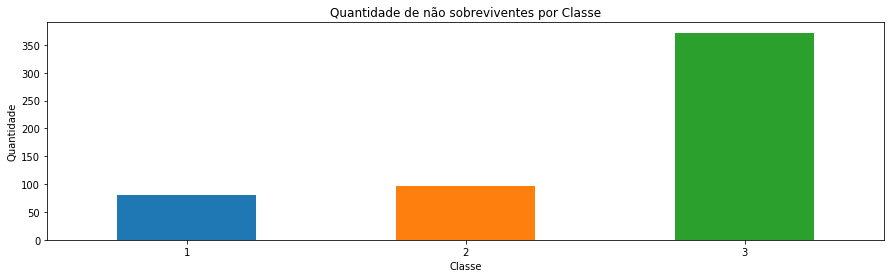

In [112]:
n_surv_class_df = titanic_df[titanic_df['Survived'] == 0].groupby('Pclass')
n_surv_class_df['Survived'].count().plot(kind='bar', title='Quantidade de não sobreviventes por Classe', rot=0, figsize=(15,4)).set_xlabel('Classe')
plt.ylabel('Quantidade')

print('No gráfico abaixo é possível visualizer a distribuição de não sobreviventes por Classe.')

No gráfico abaixo é possível visualizer a distribuição de sobreviventes por Classe.


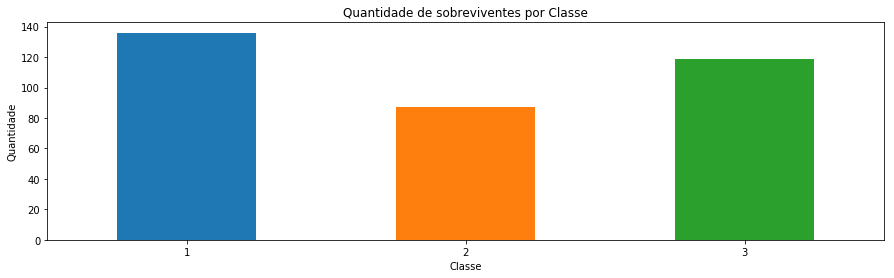

In [113]:
n_surv_class_df = titanic_df[titanic_df['Survived'] == 1].groupby('Pclass')
n_surv_class_df['Survived'].count().plot(kind='bar', title='Quantidade de sobreviventes por Classe', rot=0, figsize=(15,4)).set_xlabel('Classe')

plt.ylabel('Quantidade')

print('No gráfico abaixo é possível visualizer a distribuição de sobreviventes por Classe.')

No gráfico abaixo faz um comparativo de sobreviventes e não sobreviventes por classe e sexo separados


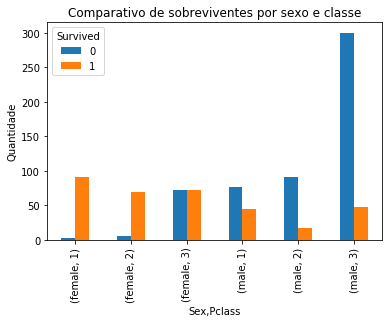

In [117]:
titanic_df.pivot_table('PassengerId', ['Sex', 'Pclass'], 'Survived', aggfunc='count').plot(kind='bar', title= 'Comparativo de sobreviventes por sexo e classe')
plt.ylabel('Quantidade')

print('No gráfico abaixo faz um comparativo de sobreviventes e não sobreviventes por classe e sexo separados')

## Conclusão:
Após análise dos dados do Titanic, foi possível tirar como resultado que o fator classe e sexo foram definitivos para a sobrevivência dos passageiros. Temos um alto índice de sobrevivência entre as mulheres da primeira e seguna classe (classes mais privilegiadas). Temos também um alto índice de mortes dos homens da terceira classe.
Vemos então que houve um grande problema de disponibilidade de botes para todos os passageiros e percebemos que a 1 e 2 classes foram as mais privilegiadas no momento da distribuição dos botes.

## Limitações

Numa primeira visão, encontrou=se como fator limitante os campos vazios nas colunas da base de dados, o que tornou mais trabalhoso no momento da tratativa. Estas características são: Age, Cabin e Embarked.
* Age: Os valores faltantes foram preenchidos efetuando uma média das idades pelo sexo e classe.
* Age: Normalizar as idades dos passageiros que estão menores que 1 ano
